In [7]:
import numpy as np
import corner

In [12]:
good_walkers_NFW = np.load("good_walkers_NFW.npy")
bad_samples_NFW = np.load("bad_samples_NFW.npy")

In [14]:
ns_NFW, nw_NFW, nd_NFW = bad_samples_NFW.shape

In [15]:
flat_bad_samples_NFW = bad_samples_NFW.reshape(ns_NFW*nw_NFW, nd_NFW)

In [16]:
mini_soln = [np.log10(0.05812451),3.601276359,385.2756031,6.748078457,0.002449669,30.24921674,1.080172553,0.69825044,36.61004742,37.67680252,11.81343922]

In [18]:
labels = ['rho_b','R_b', 'Sigma_d','R_d','rho_h','R_h','i','phi','x','y','vsys']

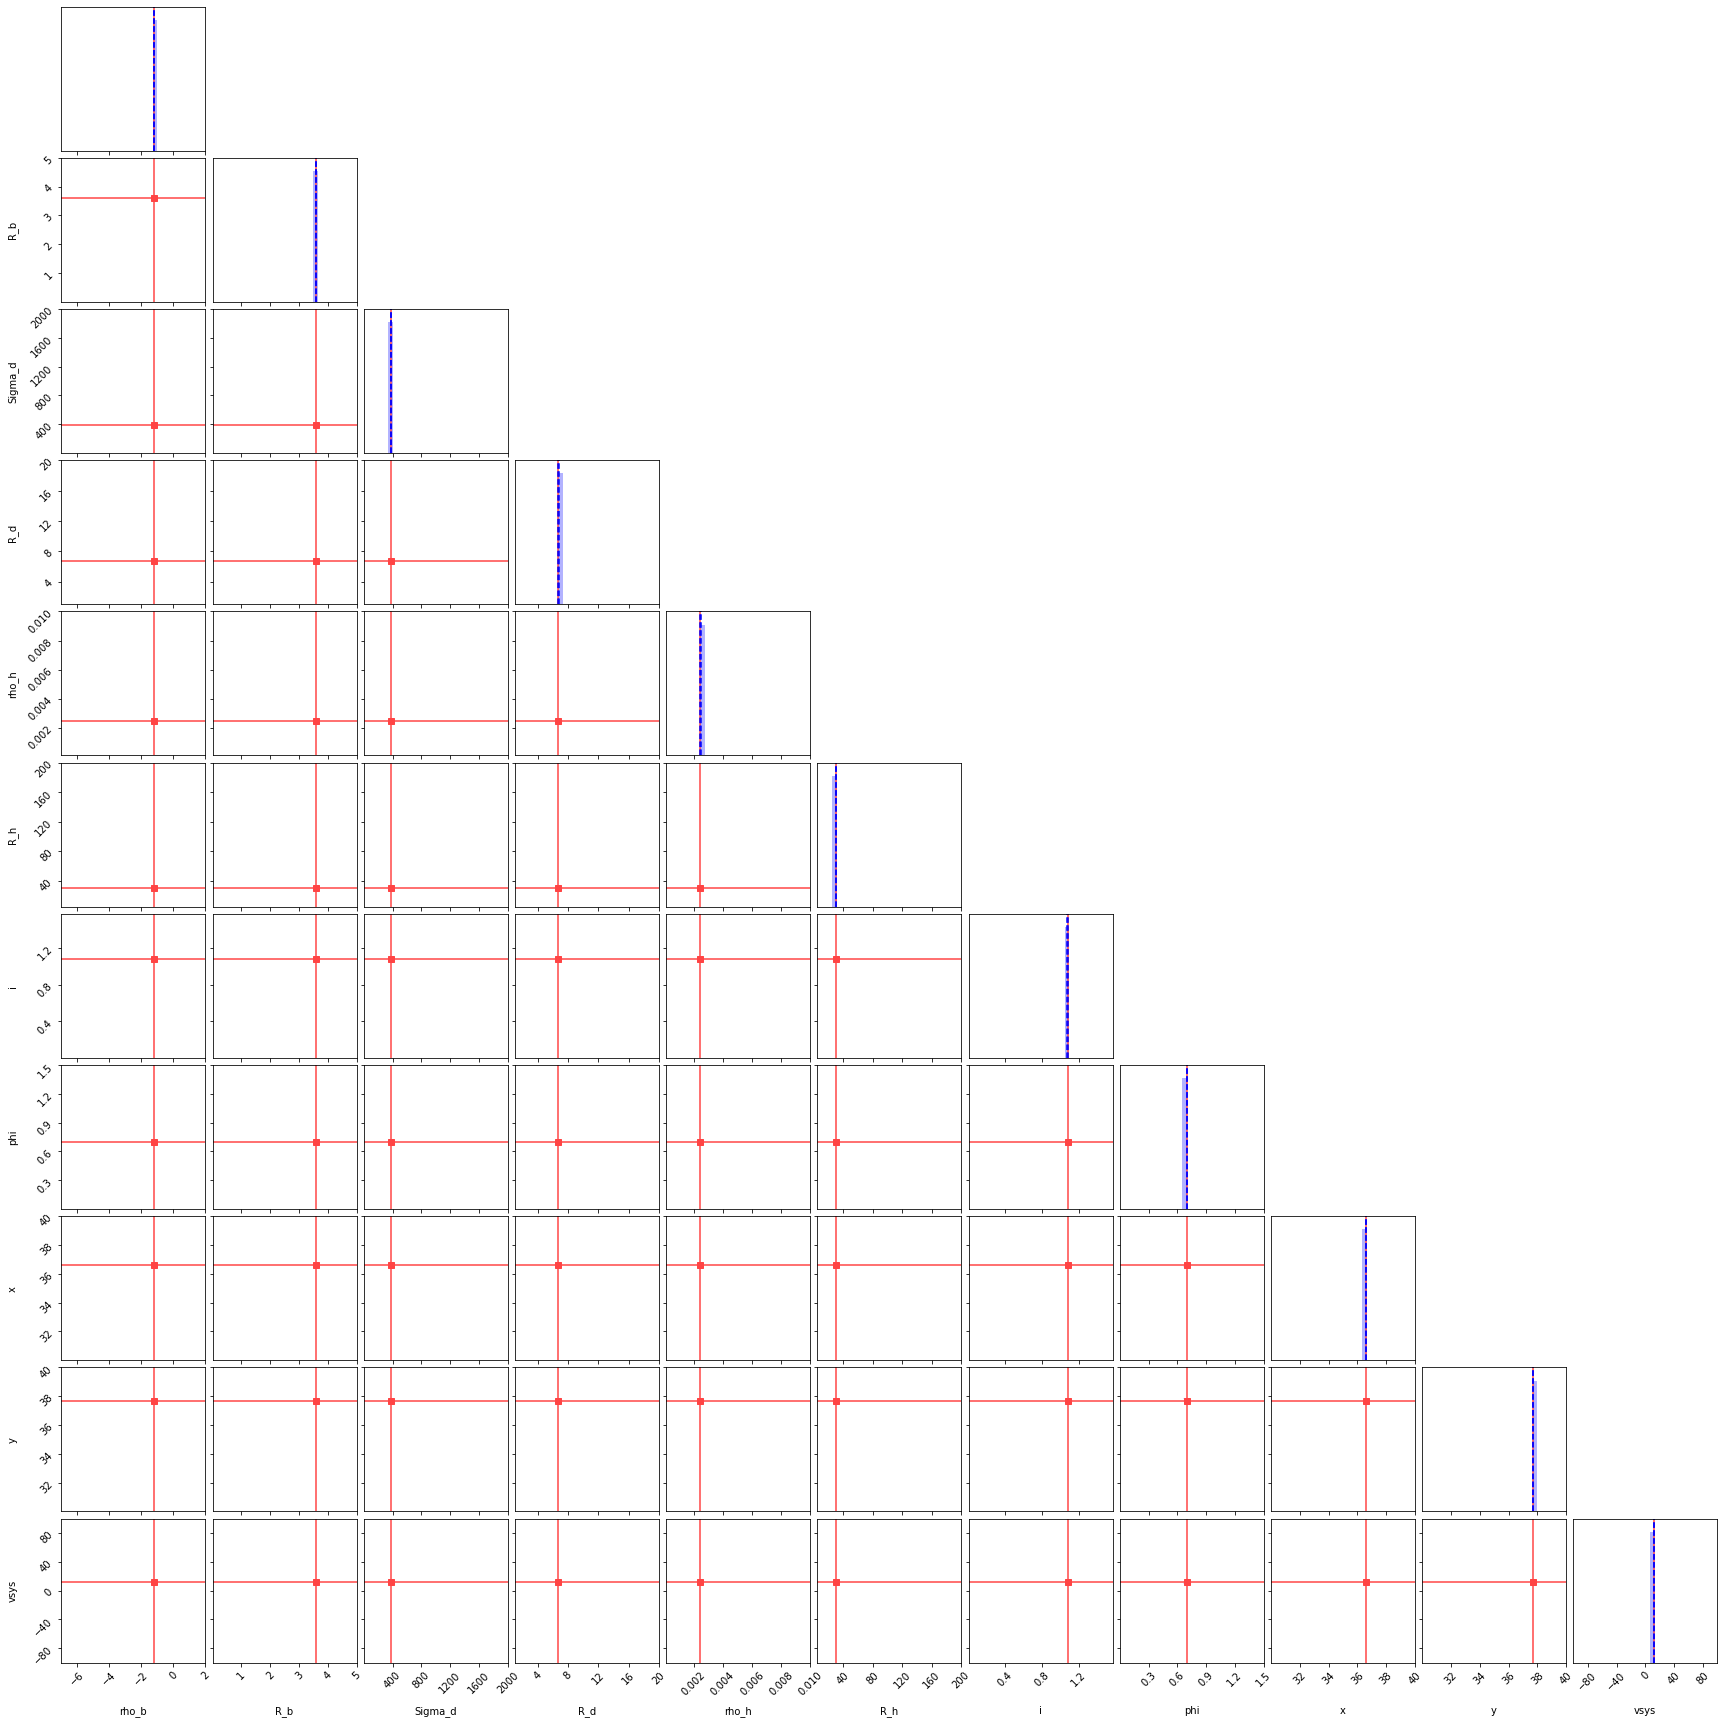

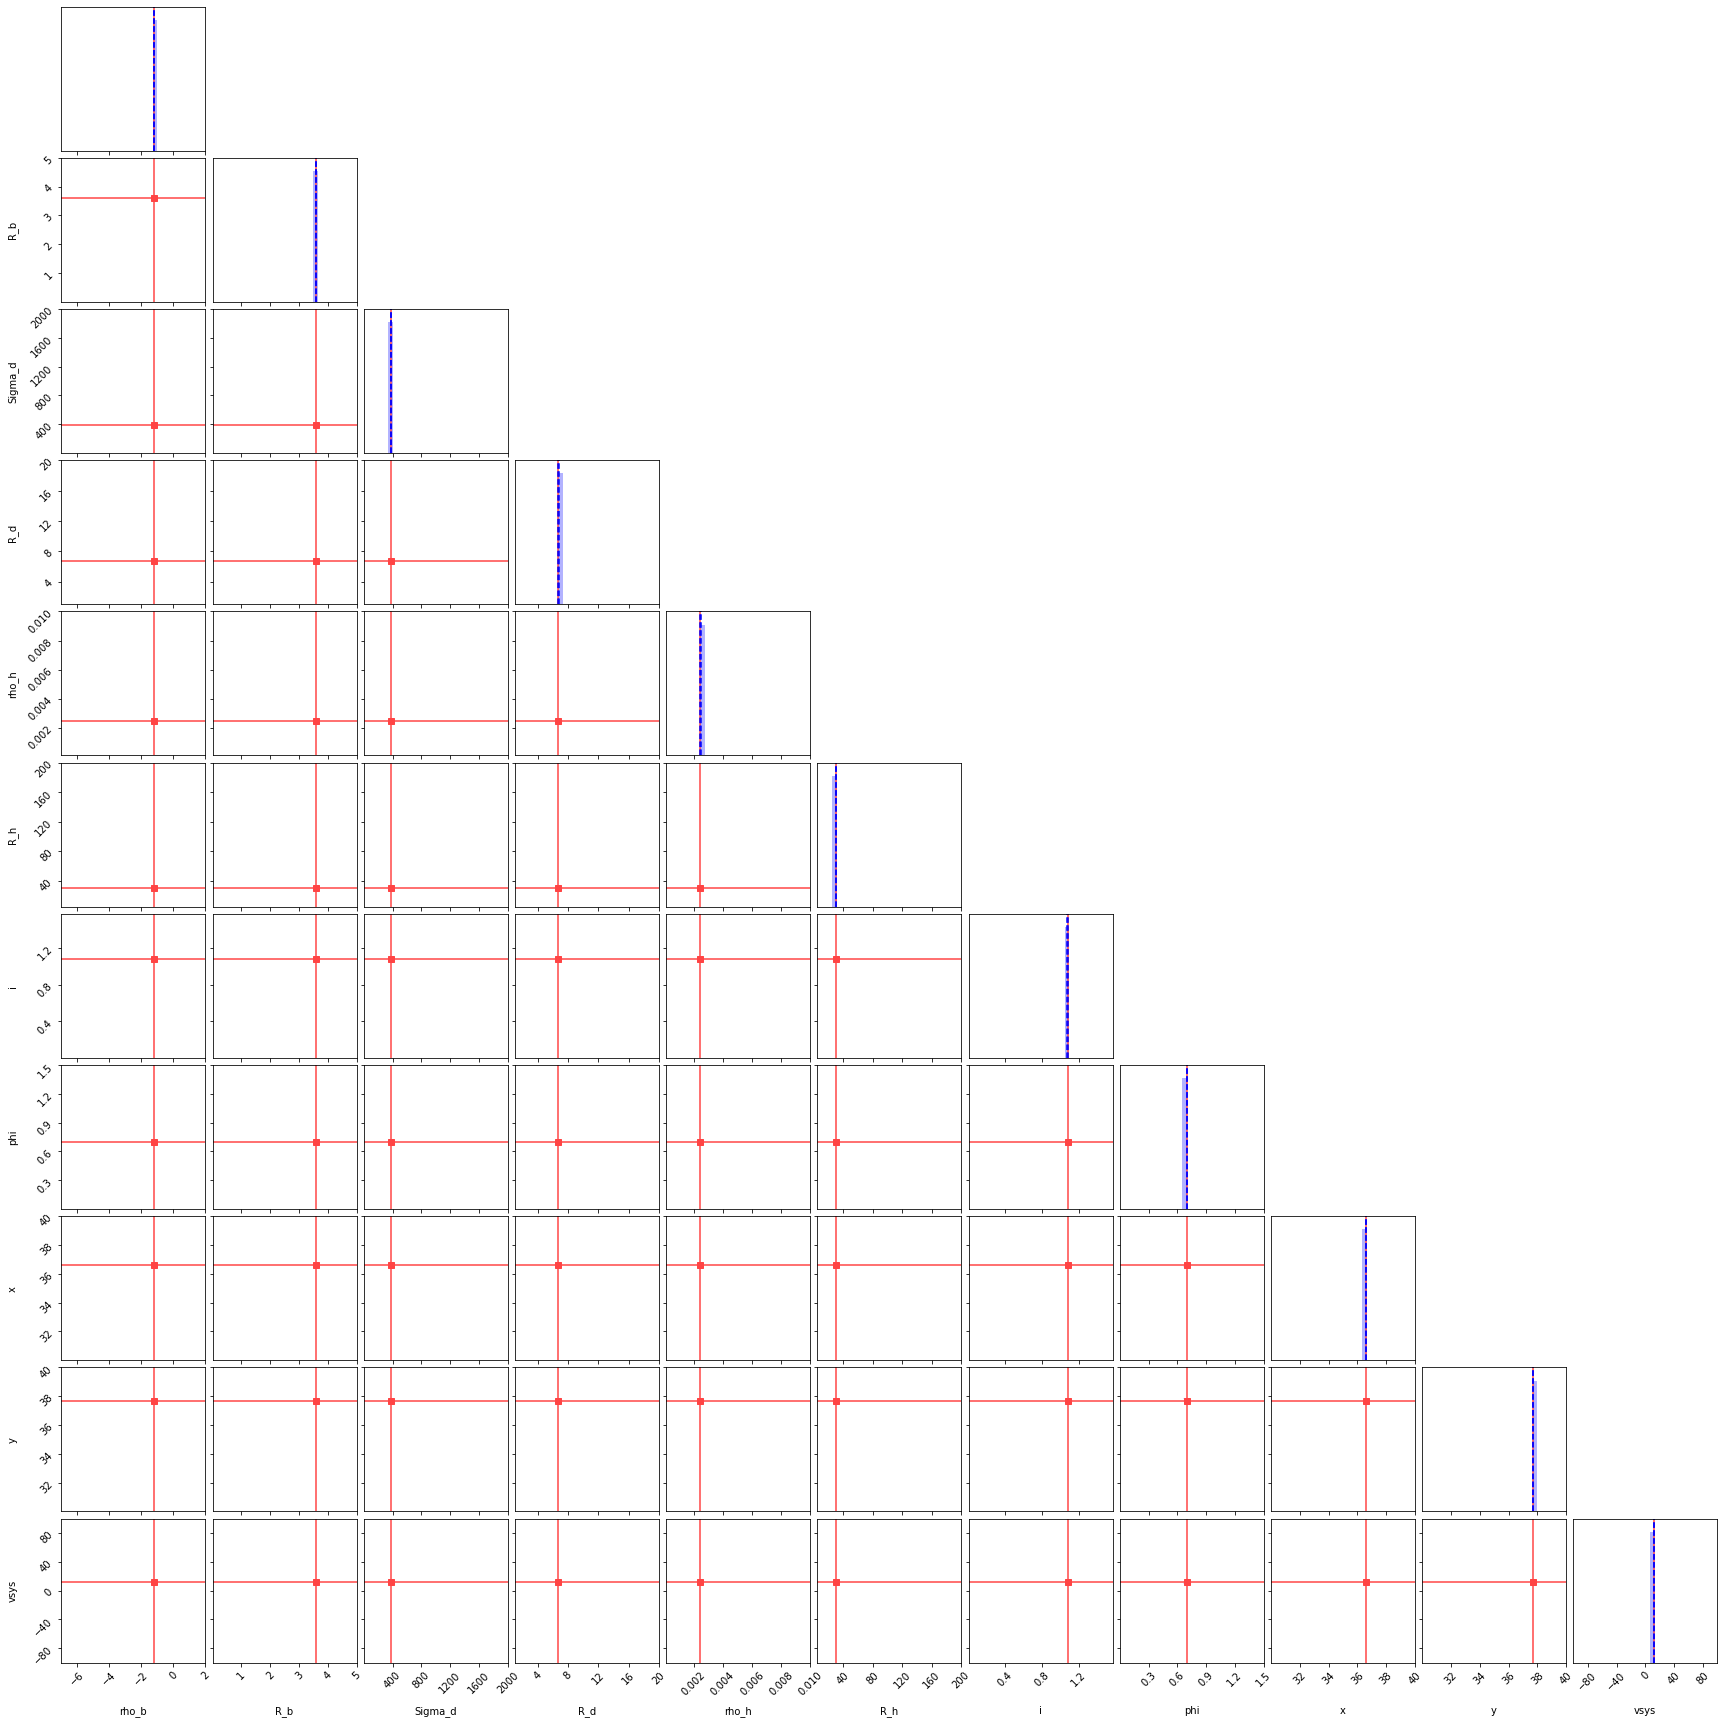

In [19]:
corner.corner(flat_bad_samples_NFW, labels=labels,
                    range=[(-7,2), (0,5), (0,2000),(1,20),(0.0001,0.01),(5,200),(0,np.pi/2),(0,1.5),(30,40),(30,40),(-100,100)], bins=30, #smooth=1,
                    truths=mini_soln, truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
                    quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True)

In [20]:
good_walkers_iso = np.load("good_walkers_iso.npy")
bad_samples_iso = np.load("bad_samples_iso.npy")

In [21]:
ns_iso, nw_iso, nd_iso = bad_samples_iso.shape

In [22]:
flat_bad_samples_iso = bad_samples_iso.reshape(ns_iso*nw_iso, nd_iso)

In [24]:
mini_soln_iso = [np.log10(0.048688757),2.549862293,748.5940907,5.617303041,0.002927534,0.100051148,1.070928683,0.699892835,36.61461409,37.68004929,11.37083843]

/Users/richardzhang/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


ValueError: Axis limits cannot be NaN or Inf

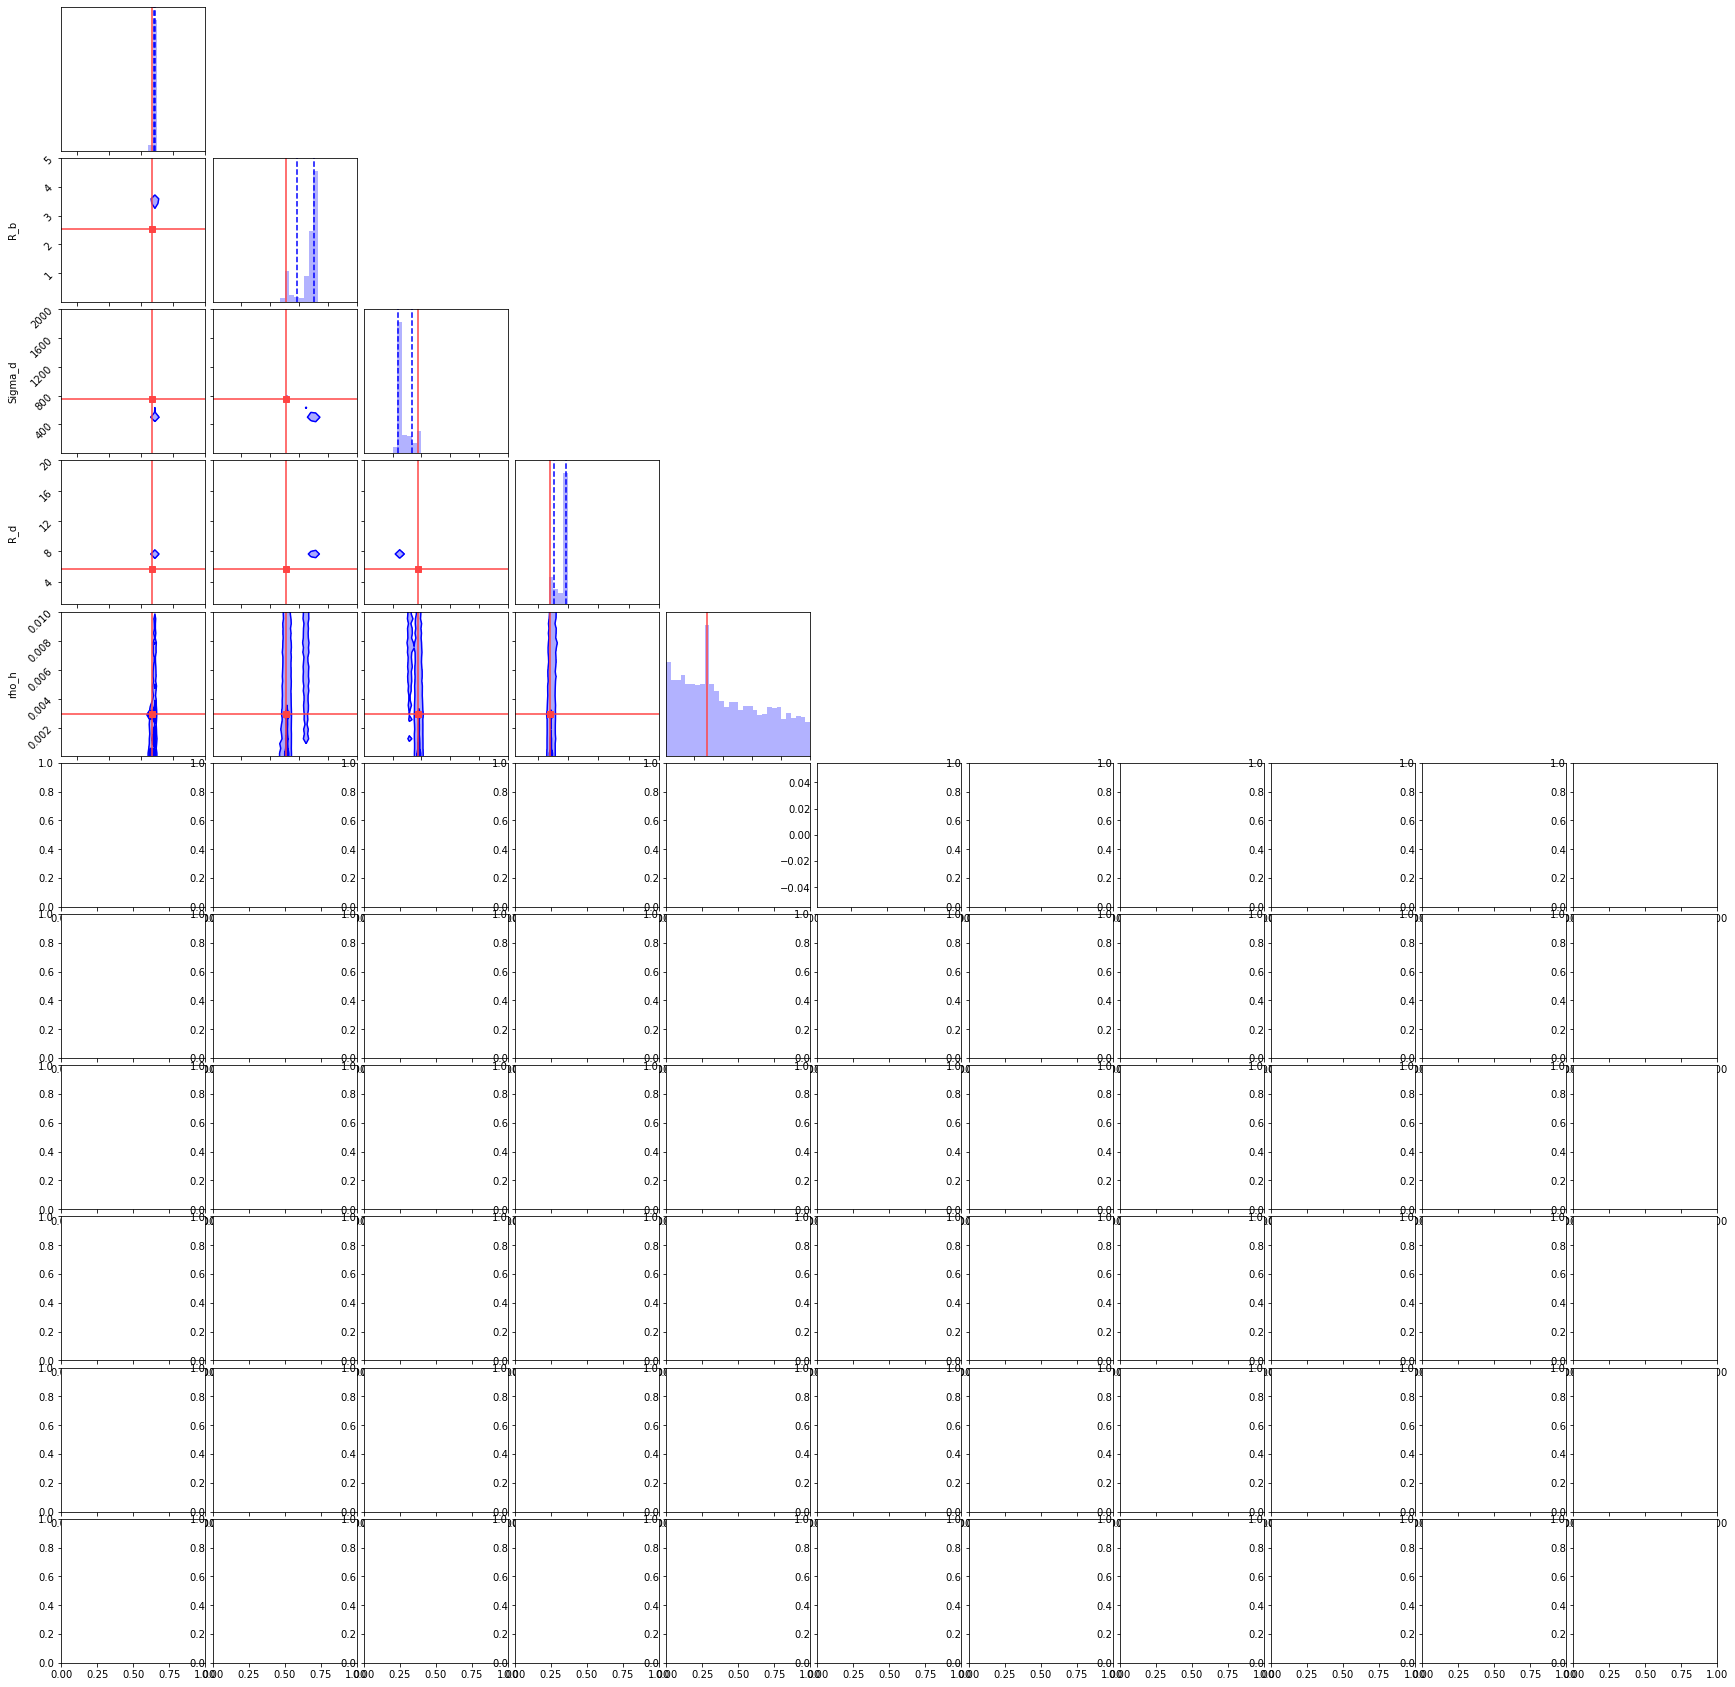

In [25]:
corner.corner(flat_bad_samples_iso, labels=labels,
                    range=[(-7,2), (0,5), (0,2000),(1,20),(0.0001,0.01),(5,200),(0,np.pi/2),(0,1.5),(30,40),(30,40),(-100,100)], bins=30, #smooth=1,
                    truths=mini_soln_iso, truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
                    quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True)